# Importing the necessary python libraries and the dataset:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Load data from the csv to the pandas data frame
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")

In [40]:
#Print 5 first rows from this dataset
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [41]:
#To show how many rows and columns are in this dataset:
data.shape


(2755, 7)

In [42]:
#To show how many nan and null values are in this dataset
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [43]:
#To drop all nan and null values are in this dataset
data.dropna(inplace = True)

In [44]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [45]:
#To show only the column's title of this data
data.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [46]:
#To Find any duplicate values in this dataset
data.duplicated().sum()

0

In [47]:
#To get some basic information about this dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   object 
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 167.2+ KB


In [48]:
#To find how many categories in column "Country" of this dataset
data["Country"].value_counts()

Country
United States           720
China                   610
India                   134
Russia                  118
Germany                 115
                       ... 
Venezuela                 1
Eswatini (Swaziland)      1
Algeria                   1
Liechtenstein             1
Nepal                     1
Name: count, Length: 70, dtype: int64

#### The NetWorth column in this dataset has a $ sign at the beginning of Billionaries' Net worth and B at the end. So we need to remove these sign and convert the NetWorth column to float:

In [49]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

In [50]:
data.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


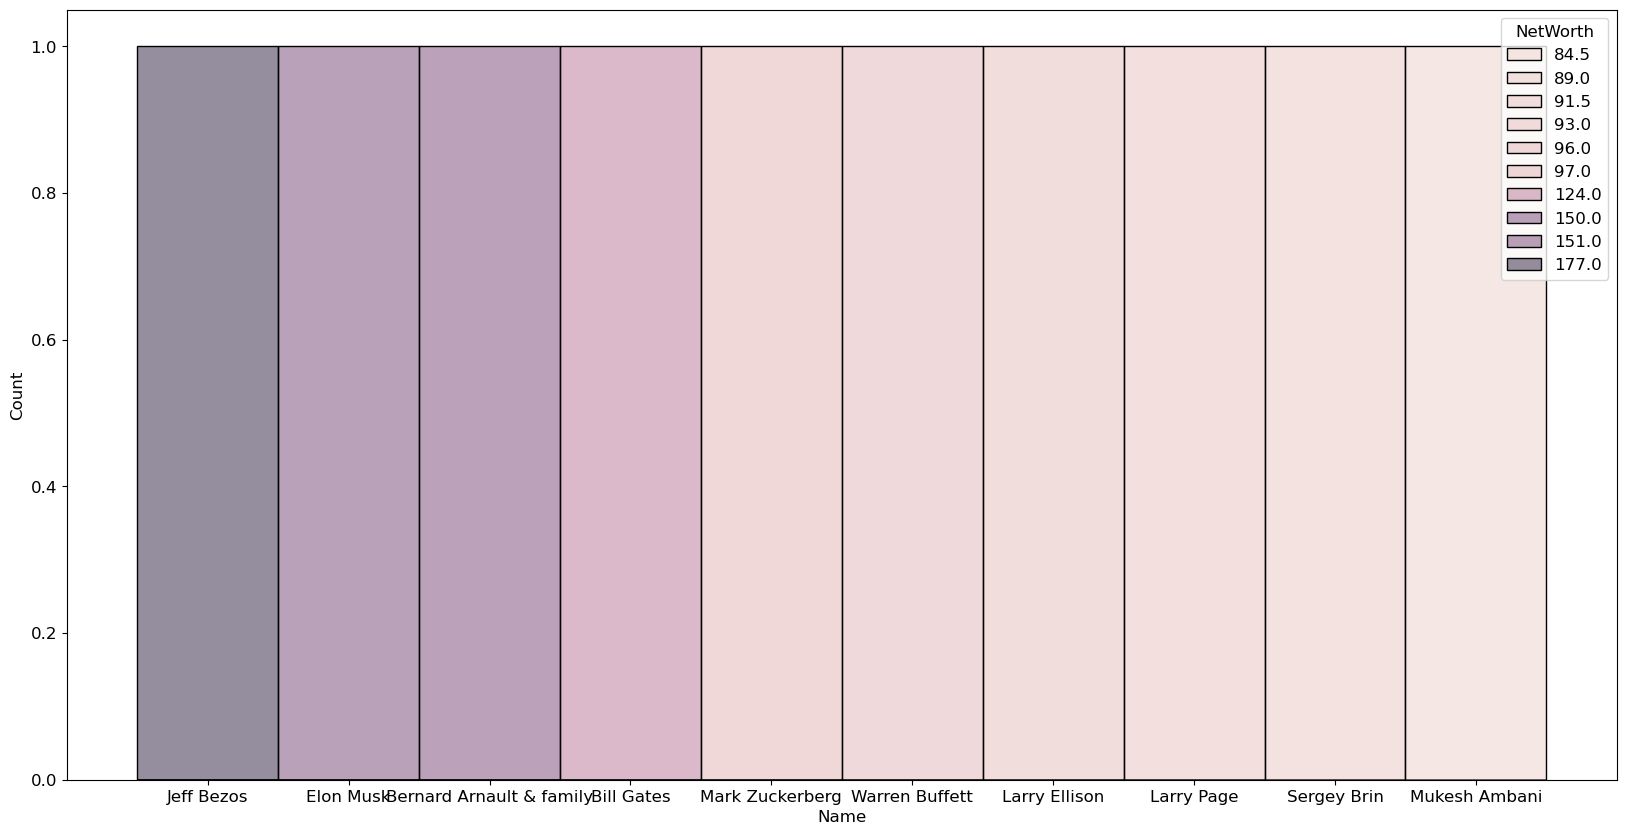

In [51]:
#We try to look at the 10 billionaires according to their net worth
df = data.sort_values(by = ["NetWorth"], ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x = "Name", hue = "NetWorth", data = df)
plt.show()

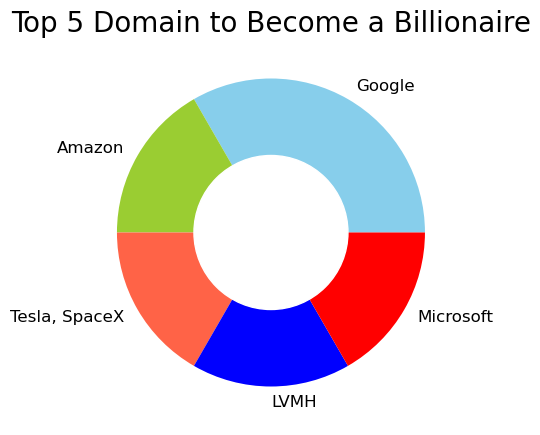

In [52]:
#Let's try to look at the top 5 domains with the most number of bilinear
a = df["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue","yellowgreen","tomato","blue","red"]
plt.figure(figsize = (5,5))
plt.pie(sources, labels = index, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size=12)
plt.title("Top 5 Domain to Become a Billionaire", fontsize=20)
plt.show()

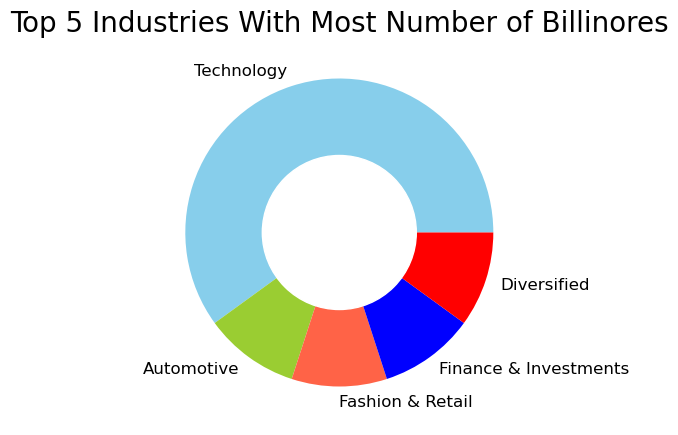

In [58]:
#Try to look at the top 5 industries with the most number of billionaires:
a = df["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(5,5))
plt.pie(industries, labels = index, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle) 
plt.rc("font", size = 12)
plt.title("Top 5 Industries With Most Number of Billinores", fontsize = 20)
plt.show()

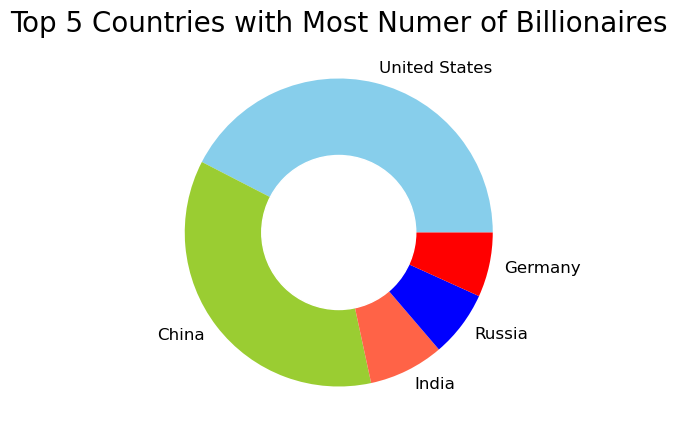

In [71]:
#Try to look at the top 5 countries with the most number of Billionaires:
a = data["Country"].value_counts().head()
index = a.index
countries = a.values
custom_color = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize = (5,5))
plt.pie(countries, labels = index, colors = custom_color)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size = 12)
plt.title("Top 5 Countries with Most Numer of Billionaires", fontsize = 20)
plt.show()